In [1]:
import os
import numpy as np
import numpy.ma as ma
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import seaborn as sns
import iris
import iris.quickplot as qplt
import iris.plot as iplt
import cartopy.crs as ccrs
from iris.coord_categorisation import add_year, add_month_number, add_day_of_month, add_day_of_year
import iris.util as iutil
import pandas as pd
#from scipy.signal import butter, lfilter
from scipy.signal import find_peaks
import datetime
#from eofs.iris import Eof
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
#%matplotlib tk

ERROR 1: PROJ: proj_create_from_database: Open of /opt/scitools/conda/deployments/default-2023_10_10/share/proj failed


In [2]:
def read_pr_mean(dates_df):
    gpm_dir = '/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded'
    date_labels = [date.strftime('%Y%m%d') for date in dates_df.Date]
    # Generate a list of file paths
    files = []
    for date_label in date_labels:
        file = os.path.join(gpm_dir, f'GPM_daily_SEA_{date_label}.nc')
        if os.path.exists(file):
            files.append(file)
        else:
            print(f'{file} not found.')
    cubes = iris.load_cube(files)
    cubes = cubes.intersection(latitude=(-10, 25), longitude=(90, 145))
    return cubes.collapsed('time', iris.analysis.MEAN)

In [3]:
def pr_variance_season(dates_df):
    gpm_dir = '/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded'
    date_labels = [date.strftime('%Y%m%d') for date in dates_df.Date]
    # Generate a list of file paths
    files = []
    for date_label in date_labels:
        file = os.path.join(gpm_dir, f'GPM_daily_SEA_{date_label}.nc')
        if os.path.exists(file):
            files.append(file)
    cubes = iris.load_cube(files)
    cubes = cubes.intersection(latitude=(-10, 25), longitude=(90, 145))
    return cubes.collapsed('time', iris.analysis.VARIANCE)

In [12]:
def read_create_data_for_composites(dates_df, file_name=None):
    gpm_dir = '/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded'
    date_labels = [date.strftime('%Y%m%d') for date in dates_df.Date]
    # Generate a list of file paths
    files = []
    for date_label in date_labels:
        file = os.path.join(gpm_dir, f'GPM_daily_SEA_{date_label}.nc')
        if os.path.exists(file):
            files.append(file)
        else:
            print(f'{file} not found.')
    cubes = iris.load_cube(files)
    cubes = cubes.intersection(latitude=(-10, 25), longitude=(90, 145))
    
    #iris.save(cubes, file_name)
    return cubes.collapsed('time', iris.analysis.MEAN)

In [6]:
paper_data_folder = '/project/MJO_GCSS/SoutheastAsia_data/ISV_paper_data'
paper_plot_folder = './'

In [7]:
start_date = datetime.datetime(2000, 6, 1)
end_date = datetime.datetime(2021, 12, 31)
dates_df = pd.DataFrame({'Date': pd.date_range(start=start_date, end=end_date)})
# Convert 'Date' column to datetime
dates_df['Date'] = pd.to_datetime(dates_df['Date'])

# Select months between May and September
summer_dates_df = dates_df[(dates_df['Date'].dt.month.isin([5,6,7,8,9]))]
winter_dates_df = dates_df[(dates_df['Date'].dt.month.isin([11, 12, 1, 2, 3]))]

In [8]:
len(summer_dates_df), len(winter_dates_df)
#summer_dates_df, winter_dates_df

(3335, 3237)

In [13]:
file_name = os.path.join('/project/MJO_GCSS/SoutheastAsia_data/GPM/data_for_composites', 'pr_data_mjjas.nc')
pr_mjjas_mean = read_create_data_for_composites(summer_dates_df, file_name=file_name)

In [14]:
pr_mjjas_mean

<iris 'Cube' of precipitation_flux / (mm day-1) (latitude: 350; longitude: 550)>

In [10]:
bsiso_df = pd.read_csv('Lee_BSISO_MJJAS_index.csv')
bsiso_df = bsiso_df.loc[bsiso_df.month.isin([5,6,7,8,9])]
bsiso_df['Date'] =  [datetime.datetime(y,m,d) for y, m, d in zip(bsiso_df.year, bsiso_df.month, bsiso_df.day)]
#bsiso_df.Date

In [16]:
df_all = bsiso_df.loc[(bsiso_df['year'].isin(range(2000, 2021, 1)))]
for phase in range(1,9):
    df_phase = df_all.loc[(df_all['8_phases']==phase) & (df_all['amp']>=1.)]
    file_name = os.path.join('/project/MJO_GCSS/SoutheastAsia_data/GPM/data_for_composites', f'pr_data_phase{phase}_anomaly.nc')
    phase_anom = read_create_data_for_composites(df_phase) - pr_mjjas_mean
    iris.save(phase_anom, file_name)
    print(f'Written {file_name}')

/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000507.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000508.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000509.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000510.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000511.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000512.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000513.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000514.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000515.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000516.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_dow

In [ ]:
df_all = bsiso_df.loc[(bsiso_df['year'].isin(range(2000, 2021, 1)))]
df_phase1 = df_all.loc[(df_all['4_phases']==1) & (df_all['amp']>=1.)]
df_phase2 = df_all.loc[(df_all['4_phases']==2) & (df_all['amp']>=1.)]
df_phase3 = df_all.loc[(df_all['4_phases']==3) & (df_all['amp']>=1.)]
df_phase4 = df_all.loc[(df_all['4_phases']==4) & (df_all['amp']>=1.)]

In [14]:
file_name = os.path.join('/project/MJO_GCSS/SoutheastAsia_data/GPM/data_for_composites', 'pr_data_ndjfm.nc')
read_create_data_for_composites(winter_dates_df, file_name=file_name)

In [19]:
bsiso_df = pd.read_csv('Lee_BSISO_MJJAS_index.csv')
bsiso_df = bsiso_df.loc[bsiso_df.month.isin([5,6,7,8,9])]
bsiso_df['Date'] =  [datetime.datetime(y,m,d) for y, m, d in zip(bsiso_df.year, bsiso_df.month, bsiso_df.day)]
#bsiso_df.Date

In [20]:
df_all = bsiso_df.loc[(bsiso_df['year'].isin(range(2000, 2021, 1)))]
df_phase1 = df_all.loc[(df_all['4_phases']==1) & (df_all['amp']>=1.)]
df_phase2 = df_all.loc[(df_all['4_phases']==2) & (df_all['amp']>=1.)]
df_phase3 = df_all.loc[(df_all['4_phases']==3) & (df_all['amp']>=1.)]
df_phase4 = df_all.loc[(df_all['4_phases']==4) & (df_all['amp']>=1.)]

In [21]:
len(df_all)

3213

In [22]:
file_name = os.path.join('/project/MJO_GCSS/SoutheastAsia_data/GPM/data_for_composites', 'pr_data_phase1.nc')
read_create_data_for_composites(df_phase1, file_name=file_name)

/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000503.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000504.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000505.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000506.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000507.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000508.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000509.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000510.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000511.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000512.nc not found.
/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_dow

In [23]:
file_name = os.path.join('/project/MJO_GCSS/SoutheastAsia_data/GPM/data_for_composites', 'pr_data_phase2.nc')
read_create_data_for_composites(df_phase2, file_name=file_name)

In [24]:
file_name = os.path.join('/project/MJO_GCSS/SoutheastAsia_data/GPM/data_for_composites', 'pr_data_phase3.nc')
read_create_data_for_composites(df_phase3, file_name=file_name)

In [25]:
file_name = os.path.join('/project/MJO_GCSS/SoutheastAsia_data/GPM/data_for_composites', 'pr_data_phase4.nc')
read_create_data_for_composites(df_phase4, file_name=file_name)

/project/MJO_GCSS/SoutheastAsia_data/GPM/daily_downloaded/GPM_daily_SEA_20000531.nc not found.


In [35]:
summer_var = pr_variance_season(summer_dates_df)
winter_var = pr_variance_season(winter_dates_df)

In [36]:
diff_var = summer_var - winter_var

In [37]:
diff_var.data.max()

153.26714

In [38]:
mask = diff_var.data > 10000.
# Apply the mask to the cube
diff_var.data = np.ma.array(diff_var.data, mask=mask)

In [39]:
#qplt.pcolormesh(diff_var)
#winter_var.data.max()

120     1981-05-01
121     1981-05-02
122     1981-05-03
123     1981-05-04
124     1981-05-05
           ...    
15581   2023-08-29
15582   2023-08-30
15583   2023-08-31
15584   2023-09-01
15585   2023-09-02
Name: Date, Length: 6551, dtype: datetime64[ns]

In [26]:
pr_season_mean = read_pr_mean(summer_dates_df)

In [13]:
#pr_winter_mean = read_pr_mean(winter_dates_df)

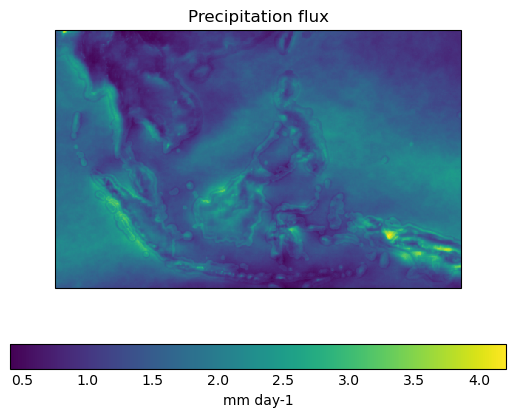

In [27]:
#qplt.pcolormesh(pr_winter_mean)

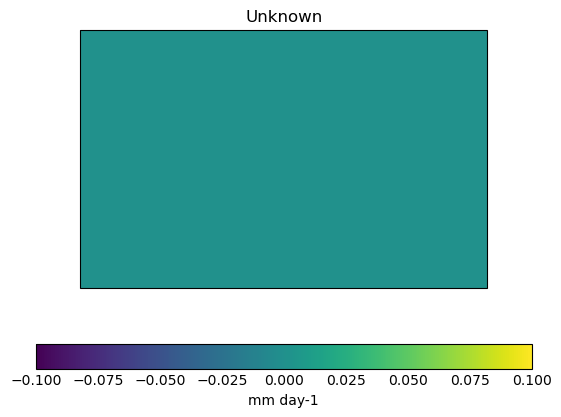

In [28]:
qplt.pcolormesh(pr_season_mean - pr_winter_mean)

In [16]:
len(df_phase1), len(df_phase2), len(df_phase3), len(df_phase4)

(484, 492, 520, 506)

In [17]:
#qplt.contourf(v_season_mean)

1 736 [1]
2 773 [2]
3 876 [3]
4 820 [4]


1 736 [1]
2 773 [2]
3 876 [3]
4 820 [4]


In [29]:
fig = plt.figure(1, figsize=(12, 4), dpi=100)
xskip = 7
yskip = 7



array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])